In [15]:
from PIL import Image , ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.optimizers import Adam

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def download_data(path): 
  data = []
  for path_image in sorted(os.listdir(path=path)): 
    image = Image.open(path + path_image)
    data.append(np.array(image))
  return data

In [9]:
X_train = download_data(r"./drive/MyDrive/Datasets/ISBI2012/train/image/")
Y_train = download_data(r"./drive/MyDrive/Datasets/ISBI2012/train/label/")
X_test = download_data(r"./drive/MyDrive/Datasets/ISBI2012/test/image/")
Y_test = download_data(r"./drive/MyDrive/Datasets/ISBI2012/test/label/")

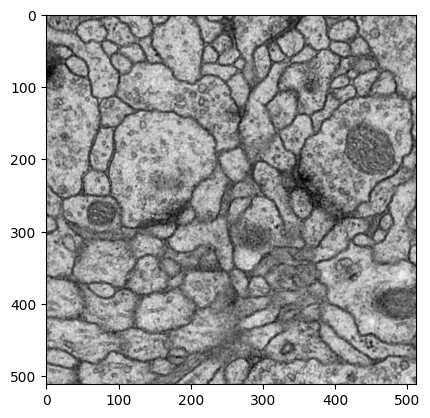

In [10]:
I=0
plt.imshow(X_train[I], cmap='gray')

In [11]:
X_train_pred = np.array(X_train).reshape([30, 512, 512, 1])/255
Y_train_pred = np.array(Y_train).reshape([30, 512, 512, 1])/255

X_test_pred = np.array(X_test).reshape([30, 512, 512, 1])/255 
Y_test_pred = np.array(Y_test).reshape([30, 512, 512, 1])/255

In [16]:
model = Sequential()
model.add(Conv2D(64, 5, input_shape=[512, 512, 1], activation = 'relu', padding ='same'))
model.add(Conv2D(64, 5, activation = 'relu', padding ='same'))
model.add(Conv2D(64, 5, activation = 'relu', padding ='same')) 
model.add(Conv2D(64, 5, activation = 'relu', padding ='same'))
model.add(Conv2D(64, 5, activation = 'relu', padding ='same')) 
model.add(Conv2D(1, 1, activation = 'sigmoid'))
model.compile(optimizer = Adam(), loss = 'mse')

In [18]:
model.fit(X_train_pred , Y_train_pred , epochs=15, batch_size=1)

Epoch 1/15
30/30 [==============================] - 791s 26s/step - loss: 0.1713
Epoch 2/15
30/30 [==============================] - 789s 26s/step - loss: 0.1271
Epoch 3/15
30/30 [==============================] - 789s 26s/step - loss: 0.1095
Epoch 4/15
30/30 [==============================] - 794s 27s/step - loss: 0.1036
Epoch 5/15
30/30 [==============================] - 789s 26s/step - loss: 0.1057
Epoch 6/15
30/30 [==============================] - 776s 26s/step - loss: 0.1005
Epoch 7/15
30/30 [==============================] - 775s 26s/step - loss: 0.0931
Epoch 8/15
30/30 [==============================] - 762s 25s/step - loss: 0.0905
Epoch 9/15
30/30 [==============================] - 766s 26s/step - loss: 0.0857
Epoch 10/15
30/30 [==============================] - 770s 26s/step - loss: 0.0898
Epoch 11/15
30/30 [==============================] - 761s 25s/step - loss: 0.0862
Epoch 12/15
30/30 [==============================] - 766s 26s/step - loss: 0.0842
Epoch 13/15
30/30 [======

In [19]:
print("MSE: ", model.evaluate(X_test_pred , Y_test_pred , batch_size=1))

30/30 [==============================] - 141s 5s/step - loss: 0.1890
MSE:  0.1889771819114685


In [20]:
out = model.predict(X_test_pred , batch_size=1)

30/30 [==============================] - 143s 5s/step


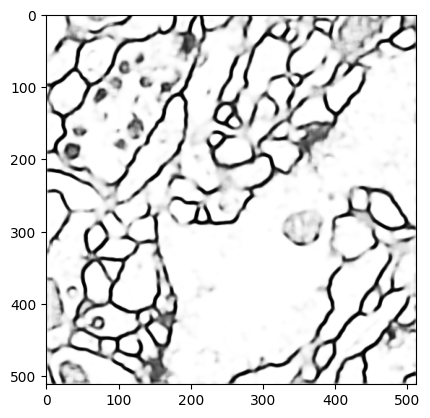

In [22]:
I=0
plt.imshow(out[I].reshape([512, 512]), cmap='gray')

| Количество слоев | Количество эпох |  batch_size | MSE | 
|----------|----------|----------|----------|
| 5    | 15   | 1   | 0.1889   |
| 5    | 15   | 2   | 0.2039   |
| 5    | 15   | 10  | 0.2156   |
| 5    | 30   | 1   | 0.2249   |
| 5    | 30   | 2   | 0.2082   |
| 5    | 30   | 10  | 0.2166   |
| 3    | 15   | 1   | 0.1696   |
| 3    | 15   | 2   | 0.1764   |
| 3    | 15   | 10  | 0.1813   |
| 3    | 30   | 1   | 0.1718   |
| 3    | 30   | 2   | 0.1797   |
| 3    | 30   | 10  | 0.1832   |
| 7    | 15   | 1   | 0.2064   |
| 7    | 15   | 2   | 0.2018   |
| 7    | 15   | 10  | 0.2201   |
| 7    | 15   | 1   | 0.2235   |
| 7    | 30   | 2   | 0.2276   |
| 7    | 30   | 10  | 0.2289   |
| 2    | 15   | 1   | 0.1511   |
| 2    | 10   | 1   | 0.1654   |
| 2    | 5    | 1   | 0.1608   |
| 2    | 1    | 1   | 0.1662   |
| 2    | 30   | 1   | 0.1661   |
| 2    | 100  | 1   | 0.1651   |

